## Loading dataset

In [2]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm_notebook as tqdm
%matplotlib notebook

In [205]:
survey_data_filename = "../dataset/qasurvey.xlsx"

In [206]:
df = pd.read_excel(survey_data_filename,header=1, sheet_name='Data')

In [4]:
df = df[1:]

## Helper functions

In [208]:
# Helper functions
def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(filename):
    print()
    print("Analyzing: {}".format(filename))
    df = pd.read_csv(filename,encoding=ENCODING)
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>2000:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

def analyze_df(dataframe):
    df = dataframe
    cols = df.columns.values
    total = float(len(df))
    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if pd.isnull(df[col]).all():
            df = df.drop(col,axis=1)
        else:
            if unique_count > 2000:
                print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
            else:
                print("** {}:{}".format(col,expand_categories(df[col])))
                expand_categories(df[col])
    return df


In [50]:
df1 = analyze_df(df)

408 rows
** Name of Municipalities?:[2:55.64%,1:26.47%,3:17.89%]
** Ward No:[13:16.42%,15:8.58%,16:8.33%,7:6.62%,14:5.39%,4:4.66%,5:4.66%,1:4.17%,6:3.92%,2:3.68%,26:3.19%,8:3.19%,17:2.94%,27:2.94%,3:2.7%,12:2.7%,24:2.45%,11:2.45%,9:2.45%,19:2.21%,28:1.96%,20:1.72%,18:1.23%,22:0.49%,10:0.49%,25:0.25%,23:0.25%]
** Address:[Attariya:5.88%,BP chowk:5.88%,Hospital road:3.43%,Shankadhar chwok,Madhyapur Thimi:3.19%,Lokanthali:3.19%,Gatthaghar:2.94%,Surkhet road:2.94%,Kausaltar:2.7%,Madhyapur thimi:2.21%,Jaispur:1.96%,Ganeshman chowk:1.72%,Fultekra:1.72%,Geta:1.72%,Manohara:1.47%,Piprahawa:1.23%,Rajha:1.23%,Mohanpur:0.98%,Naya basti thapuwa:0.98%,Shitalnagar:0.98%,Paraspur:0.98%,Maanpur:0.98%,Chardobato, nayaThimi:0.98%,Puraini:0.98%,Dhambojhi chowk:0.98%,Bela:0.74%,Bode:0.74%,Bus park:0.74%,Sadarline:0.74%,Sanothimi:0.74%,Godawari road:0.74%,Puraina:0.74%,Buspark road:0.74%,Loniyanpur:0.49%,Sehari:0.49%,Balkumari thimi:0.49%,Sadarline road:0.49%,Banjare gau:0.49%,Manikapur:0.49%,Nadai gau par

** HIV/STI testing and treatment Service Avaliable:[2:6.86%,1:3.92%]
** q301b0b How many days, this service is provided?:[7:2.94%,6:0.98%]
** q301b1 Service Avaliable:[1:10.78%]
** q301b1b How many days, this service is provided?:[6:7.6%,7:3.19%]
** q301b2 Service Avaliable:[1:10.54%,2:0.25%]
** q301b2b How many days, this service is provided?:[6:7.35%,7:3.19%]
** Simple abscess drainage Service Avaliable:[1:10.05%,2:0.74%]
** q301b3b How many days, this service is provided?:[6:6.86%,7:3.19%]
** q301b4 Service Avaliable:[1:6.37%,2:4.41%]
** q301b4b How many days, this service is provided?:[6:3.43%,7:2.94%]
** Foreign body removal (non- complicated) Service Avaliable:[1:9.07%,2:1.72%]
** q301b5b How many days, this service is provided?:[6:5.88%,7:3.19%]
** Acute exacerbation of COPD and asthma emergency management Service Avaliable:[1:7.35%,2:3.43%]
** q301b6b How many days, this service is provided?:[6:4.17%,7:2.94%,1:0.25%]
** PMTCT Service Avaliable:[1:6.86%,2:3.92%]
** q301b7b How m

** MUNICIPALITY.4:[0:5.64%,1:1.47%]
** NPC.4:[0:6.62%,1:0.49%]
** HA/Sr. AHW:[1:5.39%,2:1.96%]
** Sanctioned Post.5:[1:5.15%,2:0.25%]
** Filled Post.5:[1:4.66%,0:0.49%,2:0.25%]
** Available on the day of visit.5:[1:4.41%,0:0.74%,2:0.25%]
** Deputed staff (In).5:[0:5.15%,1:0.25%]
** Deputed staff (Out).5:[0:5.15%,1:0.25%]
** HFOMC/ HDC.5:[0:5.39%]
** MoHP.5:[0:5.15%,1:0.25%]
** MUNICIPALITY.5:[0:5.15%,1:0.25%]
** NPC.5:[0:5.39%]
** AHW:[1:7.11%,2:0.25%]
** Sanctioned Post.6:[3:4.66%,0:1.47%,1:0.74%,2:0.25%]
** Filled Post.6:[3:4.66%,0:1.72%,1:0.49%,2:0.25%]
** Available on the day of visit.6:[1:3.43%,2:2.45%,3:0.74%,0:0.49%]
** Deputed staff (In).6:[0:6.62%,1:0.49%]
** Deputed staff (Out).6:[0:6.86%,1:0.25%]
** HFOMC/ HDC.6:[0:6.62%,1:0.49%]
** MoHP.6:[0:6.86%,1:0.25%]
** MUNICIPALITY.6:[0:5.64%,1:1.47%]
** NPC.6:[0:7.11%]
** Lab technician:[1:0.25%]
** Sanctioned Post.7:[1:0.25%]
** Filled Post.7:[0:0.25%]
** Available on the day of visit.7:[0:0.25%]
** Deputed staff (In).7:[0:0.25%]
*

** Pan scale (infant weighing machine):[1:8.33%,3:2.45%]
** Mercury Thermometer:[1:5.15%,3:4.9%,2:0.74%]
** Digital Thermometer:[1:8.58%,3:1.47%,2:0.74%]
** Stethoscope:[1:10.78%]
** BP instrument (either digital BP machine or manual sphygmomanometer with stethoscope):[1:10.29%,2:0.49%]
** Light source (for patient examination):[1:9.07%,3:1.72%]
** Fetoscope:[1:9.56%,3:0.49%,2:0.49%]
** Measuring tape (for height measurement):[1:7.84%,3:2.7%]
** ARI Timer:[1:8.09%,3:2.21%,2:0.25%]
** De Lee Suction/Suction Machine:[99:5.39%,1:4.41%,3:0.74%]
** Newborn bag and mask:[99:5.39%,1:4.17%,3:0.98%]
** Adult bag and mask:[99:5.39%,1:3.68%,3:1.47%]
** ORT corner set (Glass, plastic jug, spoon, ORS packet, bucket):[3:4.9%,1:4.41%,2:0.98%,99:0.25%]
** Vaginal Speculum:[99:5.39%,1:4.41%,3:0.74%]
** Labour table:[99:5.39%,1:4.17%,3:0.98%]
** Safe delivery kit/Delivery kit:[3:4.41%,1:4.41%,99:1.72%]
** Partograph:[99:5.64%,1:3.68%,3:1.23%]
** Refrigerator:[1:6.37%,3:4.17%]
** Ambulance:[1:2.45%,3:0.9

** Stock out In the last one year (Times).16:[0:6.13%,1:0.98%,5:0.25%]
** Stock out In the last one year (Days).16:[50:0.25%,30:0.25%,285:0.25%,27:0.25%,20:0.25%]
** Drug Avaliable, at the time of visit?.17:[1:6.86%,2:0.25%]
** At least for 1 month(EOP).17:[1:6.62%,2:0.25%]
** If stock is less than EOP, did you make emergency order?.17:[2:0.25%,1:0.25%]
** Stock out In the last one year (Times).17:[0:6.62%,1:0.49%]
** Stock out In the last one year (Days).17:[20:0.25%,7:0.25%]
** Drug Avaliable, at the time of visit?.18:[1:3.92%,2:2.94%]
** At least for 1 month(EOP).18:[1:3.68%,2:0.25%]
** If stock is less than EOP, did you make emergency order?.18:[1:3.19%]
** Stock out In the last one year (Times).18:[0:3.68%,1:1.96%,2:0.74%,4:0.25%,3:0.25%]
** Stock out In the last one year (Days).18:[60:0.49%,30:0.49%,120:0.25%,180:0.25%,45:0.25%,90:0.25%,25:0.25%,150:0.25%,15:0.25%,3:0.25%,0:0.25%]
** Drug Avaliable, at the time of visit?.19:[2:3.43%,1:1.23%]
** At least for 1 month(EOP).19:[1:1.2

** Stock out In the last one year (Times).43:[0:2.21%]
** Drug Avaliable, at the time of visit?.44:[1:2.21%,2:0.74%]
** At least for 1 month(EOP).44:[1:2.21%]
** If stock is less than EOP, did you make emergency order?.44:[1:0.74%]
** Stock out In the last one year (Times).44:[0:2.21%,1:0.74%]
** Stock out In the last one year (Days).44:[30:0.49%,180:0.25%]
** Drug Avaliable, at the time of visit?.45:[2:0.49%,1:0.49%]
** At least for 1 month(EOP).45:[1:0.49%]
** If stock is less than EOP, did you make emergency order?.45:[1:0.49%]
** Stock out In the last one year (Times).45:[0:0.98%]
** Drug Avaliable, at the time of visit?.46:[1:5.88%]
** At least for 1 month(EOP).46:[1:5.15%,2:0.74%]
** If stock is less than EOP, did you make emergency order?.46:[1:0.74%]
** Stock out In the last one year (Times).46:[0:4.66%,1:0.74%,3:0.25%,2:0.25%]
** Stock out In the last one year (Days).46:[60:0.49%,240:0.25%,25:0.25%,12:0.25%]
** Drug Avaliable, at the time of visit?.47:[1:4.41%,2:1.47%]
** At l

** Stock out In the last one year (Days).84:[365:0.25%]
** Drug Avaliable, at the time of visit?.85:[2:0.25%]
** If stock is less than EOP, did you make emergency order?.85:[1:0.25%]
** Stock out In the last one year (Times).85:[1:0.25%]
** Stock out In the last one year (Days).85:[365:0.25%]
** Availability of government pharmacy in the hospital?:[2:0.49%]
** Regular reporting and recording of LMIS format (Govt. Hospital)?:[1:0.49%]
** Disposal procedure of expired drugs (followed as per the guideline)?:[1:7.6%,2:2.7%,3:0.49%]
** Does your HF have a functional & inclusive management committee?:[1:6.86%,2:0.74%]
** If yes, is this committee formed as per the guideline?:[1:6.37%,2:0.49%]
** How often does this committee sit for meetings?:[1:3.92%,5:2.94%]
** Does your HF have periodic municipality health plan?:[3:2.94%,1:2.7%,2:1.96%]
** Was an annual municipality Health Plan for FY 2072-73 developed for your HF?:[3:3.92%,1:2.21%,2:1.47%]
** Was a social audit conducted in the FY 2072-7

** Orthopedic surgeon:[1:2.7%,2:0.74%]
** Sanctioned Post.32:[3:0.25%,0:0.25%]
** Filled Post.32:[1:0.25%,0:0.25%]
** Available on the day of visit.32:[1:1.72%,5:0.25%,4:0.25%,3:0.25%,2:0.25%]
** Deputed staff (In).32:[0:0.49%]
** Deputed staff (Out).32:[0:0.49%]
** HFOMC/ HDC.32:[0:0.49%]
** MoHP.32:[0:0.49%]
** MUNICIPALITY.32:[0:0.49%]
** NPC.32:[0:0.49%]
** Psychiatrist:[2:2.45%,1:0.98%]
** Available on the day of visit.33:[1:0.74%,2:0.25%]
** Radiologist:[1:2.94%,2:0.49%]
** Sanctioned Post.34:[3:0.25%,0:0.25%]
** Filled Post.34:[3:0.25%,0:0.25%]
** Available on the day of visit.34:[1:1.23%,3:0.98%,2:0.74%]
** Deputed staff (In).34:[0:0.49%]
** Deputed staff (Out).34:[0:0.49%]
** HFOMC/ HDC.34:[0:0.49%]
** MoHP.34:[0:0.49%]
** MUNICIPALITY.34:[0:0.49%]
** NPC.34:[0:0.49%]
** Nursing inspector(Matron):[1:1.96%,2:1.47%]
** Sanctioned Post.35:[1:0.25%]
** Filled Post.35:[1:0.25%]
** Available on the day of visit.35:[1:1.96%]
** Deputed staff (In).35:[0:0.25%]
** Deputed staff (Out).3

In [69]:
grouped_df = df1.groupby(["Name of Municipalities?"])

In [70]:
labels = grouped_df.groups.keys()
labels

dict_keys([1, 2, 3])

In [74]:
test = df1[["Name of Municipalities?","Ceiling needs repair?"]]
test

,Name of Municipalities?,Ceiling needs repair?
id,,
1,1,2
2,3,NaN
3,1,1
4,1,2
5,1,2
6,1,NaN
7,1,2
8,1,NaN
9,3,NaN


In [75]:
test_group = test.groupby(["Name of Municipalities?"])

In [76]:
labels = grouped_df.groups.keys()
labels

dict_keys([1, 2, 3])

In [77]:
for gi,gv in test_group:
    cols = 
    analyze_df(gv)

108 rows
** Name of Municipalities?:[1:100.0%]
** Ceiling needs repair?:[2:7.41%,1:1.85%]
227 rows
** Name of Municipalities?:[2:100.0%]
** Ceiling needs repair?:[2:9.25%,1:2.64%]
73 rows
** Name of Municipalities?:[3:100.0%]
** Ceiling needs repair?:[2:9.59%]


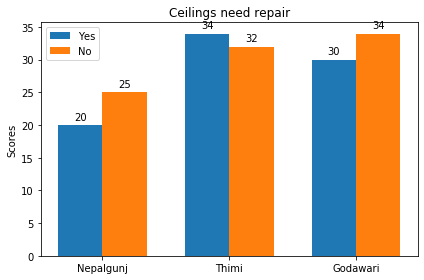

In [84]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

labels = ['Nepalgunj', 'Thimi', 'Godawari']
yes_means = [20, 34, 30]
no_means = [25, 32, 34]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, yes_means, width, label='Yes')
rects2 = ax.bar(x + width/2, no_means, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Ceilings need repair')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [89]:
df

,Unnamed: 0,Name of Municipalities?,Ward No,Address,Type of Health facility,Name of Health Facility,Under which health facility does this PHC/ORC/EPI clinic operate?,He/she is health facility in-charge or not?,Designation of respondent,Does this health facility have its own building?,...,Sweeper,Sanctioned Post.61,Filled Post.61,Available on the day of visit.61,Deputed staff (In).61,Deputed staff (Out).61,HFOMC/ HDC.61,MoHP.61,MUNICIPALITY.61,NPC.61
1,1,1,1,"Bode, khapala",7,9,NaN,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,8,Sehari,13,NaN,14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,16,Lokanthali,6,8,NaN,1,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,5,"Nagadesh, Madhyapur thimi",6,5,NaN,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1,7,Madhyapur thimi,6,6,NaN,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1,7,Madhyapur thimi,13,NaN,6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1,14,Balkumari thimi,6,7,NaN,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1,14,Balkumari thimi,13,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,3,9,Bela,9,96,NaN,2,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,3,8,Sehari,6,14,NaN,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
grouped_df = df.groupby('Name of Municipalities?')

In [7]:
def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))

municipalities = [1, 2, 3]
final_t = []
for m in municipalities:
    t = pd.DataFrame()
    x = grouped_df.get_group(m)
    x = x["Type of Health facility"]    
    temp = x.value_counts()
    t['key'] = temp.index
    t[m] = temp.values
    final_t.append(t.set_index('key'))
    


<IPython.core.display.Javascript object>


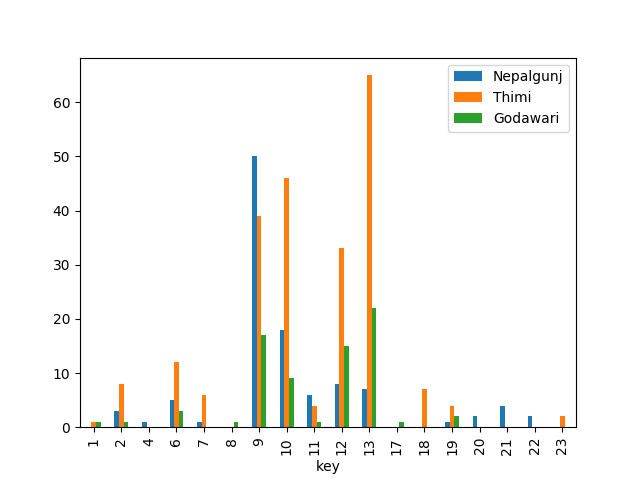

In [25]:
dd = pd.concat(final_t,axis=1)
dd.columns = ['Nepalgunj', 'Thimi', 'Godawari']
dd.fillna(0,inplace=True)
dd.plot(kind='bar')

In [108]:
temp.index

Int64Index([13, 9, 12, 10, 6, 19, 11, 8, 17, 2, 1], dtype='int64')

In [109]:
temp.values

array([22, 17, 15,  9,  3,  2,  1,  1,  1,  1,  1])

In [14]:
sss = dd['Nepalgunj']

In [17]:
def normalize(s):
    return (s - s.min())/s.max()

In [214]:
os.getcwd()
os.listdir("../dataset/")

['qasurvey.xlsx',
 'baseline.xlsx',
 'hmis.json',
 'mapped_data .csv',
 'hf_geo.xlsx']

In [215]:
df = pd.read_csv("../dataset/mapped_data.csv")

In [216]:
df.head()

,id,Name of Municipalities?,Ward No,Address,Type of Health facility,Name of Health Facility,Under which health facility does this PHC/ORC/EPI clinic operate?,He/she is health facility in-charge or not?,Designation of respondent,Does this health facility have its own building?,...,Sweeper,Sanctioned Post.61,Filled Post.61,Available on the day of visit.61,Deputed staff (In).61,Deputed staff (Out).61,HFOMC/ HDC.61,MoHP.61,MUNICIPALITY.61,NPC.61
0,1,Madhyapur thimi (Bhaktapur),1,"Bode, khapala",NaN,NaN,NaN,Yes,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Attriya (Kailali),8,Sehari,NaN,NaN,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Madhyapur thimi (Bhaktapur),16,Lokanthali,NaN,NaN,NaN,Yes,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Madhyapur thimi (Bhaktapur),5,"Nagadesh, Madhyapur thimi",NaN,NaN,NaN,Yes,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Madhyapur thimi (Bhaktapur),7,Madhyapur thimi,NaN,NaN,NaN,Yes,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
grouped_df = df.groupby('Name of Municipalities?')

In [219]:
def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))

municipalities = ['Madhyapur thimi (Bhaktapur)', 'Attriya (Kailali)', 'Nepalgunj (Banke)']
final_t = []
for m in municipalities:
    x = grouped_df.get_group(m)
    semi_final_t = []
    for col in tqdm(x.columns):
        y = x[col]    
        t = pd.DataFrame()
        temp = y.value_counts()
        t[col] = temp.index
        t[m] = temp.values
        semi_final_t.append(t.set_index(col))
    final_t.append(semi_final_t)

In [157]:
# dd = pd.concat(semi_final_t,axis=1)
# dd
for i in range(len(final_t[0])):
    ssd = pd.DataFrame([final_t[0][i], final_t[1][i], final_t[2][i]])
# dd.fillna(0,inplace=True)
# dd.plot(kind='bar')

KeyError: 0

In [220]:
pp = ['NGT', 'NTG', 'GNT']
corr = []
for i in tqdm(range(len(semi_final_t[0]))):
    jj = pd.concat([final_t[2][i], final_t[0][i], final_t[1][i]], axis=1)
#     jj.plot(kind='bar')
    jj.columns = ['N', 'T', 'G']
    jj.fillna(0, inplace=True)
    jj['which'] = None
    which = []
    question = jj.reset_index().columns[0]
    if question == 'index' or question == 'q101a': continue
    for j in range(len(jj)):
        option = jj.index[j]
        lol = print_tuple(jj.iloc[j]['N'], jj.iloc[j]['T'], jj.iloc[j]['G'])
        if lol is not None:
            corr.append([question, option, lol])
        which.append(lol)
    jj['which'] = which


/home/keshavchaurasia/Desktop/codes/everest-hack-the-end/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [221]:
corr

[['Ward No', 1, 'NTG+++'],
 ['Ward No', 2, 'NGT+++'],
 ['Ward No', 4, 'TNG---'],
 ['Ward No', 5, 'NTG+++'],
 ['Ward No', 6, 'NGT+++'],
 ['Ward No', 7, 'NTG+++'],
 ['Ward No', 8, 'TNG---'],
 ['Ward No', 9, 'TNG---'],
 ['Ward No', 12, 'TNG---'],
 ['Ward No', 13, 'NGT+++'],
 ['Ward No', 14, 'NTG+++'],
 ['Ward No', 15, 'TNG+++'],
 ['Ward No', 16, 'TNG+++'],
 ['Ward No', 17, 'NTG+++'],
 ['He/she is health facility in-charge or not?', 'Yes', 'NTG+++'],
 ['He/she is health facility in-charge or not?', 'No', 'NTG+++'],
 ['Window needs repair?', 'No', 'NTG+++'],
 ['Number of rooms available in the health facilities? Number', 2.0, 'NTG+++'],
 ['Number of rooms available in the health facilities? Number', 5.0, 'TNG+++'],
 ['Number of rooms available in the health facilities? Number', 8.0, 'NTG+++'],
 ['Do the health facility manage the accommodation facility for staff when needed?',
  'No',
  'NTG+++'],
 ['Do the health facility manage the accommodation facility for staff when needed?',
  'Yes',


In [207]:
pickle.dump(corr,open('corr','wb'))

In [108]:
for i in jj.fillna(0).iterrows():
    pass

In [200]:
def print_tuple(N,T,G):
    a = ''
    if (N > T) and (N > G):
        a += 'N'
        if T > G:
            a += 'TG'
        elif G > T:
            a += 'GT'
        else: return None
    elif (T > N) and (T > G):
        a += 'T'
        if N > G:
            a += 'NG'
        elif G > N:
            a += 'GN'
        else: return None
    elif (G > T) and (G > N):
        a += 'G'
        if T > N:
            a += 'TN'
        elif N > T:
            a += 'NT'
        else: return None
    if not a:
        return None
    if (a == 'NTG'):
        return 'NTG+++'
    elif (a == 'GTN'):
        return 'NTG---'
    
    if (a == 'NGT'):
        return 'NGT+++'
    elif (a == 'TGN'):
        return 'NGT---'
    
    if (a == 'TNG'):
        return 'TNG+++'
    elif (a == 'GNT'):
        return 'TNG---'    

In [105]:
x = print_tuple(0,1,2)
if x is not None:
    print(x)
else:
    print('Invalid')

NTG


In [89]:
a = [1,1,0]
print(sorted(a,reverse=True))

[1, 1, 0]


In [223]:
indi_df = pd.read_csv("../dataset/indicator.csv")

In [224]:
indi_df

,indicator,N,T,G,pos,neg
0,Percentage of children aged 9-11 months immuni...,83.35,91.10,86.30,TGN,NGT
1,Percentage of children aged 12-23 months immun...,73.20,67.95,52.20,NTG,GTN
2,Percentage of children aged 0-11 months regist...,54.00,93.00,74.25,TGN,NGT
3,Percentage of children aged 0-23 months regist...,38.15,89.95,46.10,TGN,NGT
4,Percentage of children aged 12-23 months regis...,21.80,87.15,19.80,TNG,GNT
5,% of children aged 0-23 months registered for ...,5.70,2.25,4.40,NGT,TGN
6,Percentage of institutional deliveries,239.10,9.60,34.25,NGT,TGN
7,Percentage of pregnant women who had four ANC ...,51.65,21.10,59.40,GNT,TNG
8,Percentage of women who had four ANC check-ups...,51.65,21.10,59.40,GNT,TNG
9,Percentage of women who had 3 PNC check-ups as...,4.10,8.80,20.15,GTN,NTG


In [227]:
indi_df[indi_df['pos'] == 'NTG']

,indicator,N,T,G,pos,neg
1,Percentage of children aged 12-23 months immun...,73.2,67.95,52.2,NTG,GTN


In [241]:
q = [a[0] for a in corr if 'NTG' in a[2]]
print(q)

    

['Ward No', 'Ward No', 'Ward No', 'Ward No', 'Ward No', 'He/she is health facility in-charge or not?', 'He/she is health facility in-charge or not?', 'Window needs repair?', 'Number of rooms available in the health facilities? Number', 'Number of rooms available in the health facilities? Number', 'Do the health facility manage the accommodation facility for staff when needed?', 'Is separate/ private space for ANC/PNC checkup available? अलग ANC र PNC जाँचको लागि र निजी स्थान उपलब्ध छरु', 'OPD service avaliable?', 'Immunization Service Avaliable', 'Postnatal service Service Avaliable', 'q301a11 Service Avaliable', 'Oral pills for family planning Service Avaliable', 'IUCD Service Avaliable', 'Female sterilization Service Avaliable', 'Female sterilization Service Avaliable', 'q301b1 Service Avaliable', 'Acute exacerbation of COPD and asthma emergency management Service Avaliable', 'Acute exacerbation of COPD and asthma emergency management Service Avaliable', 'PMTCT Service Avaliable', 'PM

In [238]:
corr

[['Ward No', 1, 'NTG+++'],
 ['Ward No', 2, 'NGT+++'],
 ['Ward No', 4, 'TNG---'],
 ['Ward No', 5, 'NTG+++'],
 ['Ward No', 6, 'NGT+++'],
 ['Ward No', 7, 'NTG+++'],
 ['Ward No', 8, 'TNG---'],
 ['Ward No', 9, 'TNG---'],
 ['Ward No', 12, 'TNG---'],
 ['Ward No', 13, 'NGT+++'],
 ['Ward No', 14, 'NTG+++'],
 ['Ward No', 15, 'TNG+++'],
 ['Ward No', 16, 'TNG+++'],
 ['Ward No', 17, 'NTG+++'],
 ['He/she is health facility in-charge or not?', 'Yes', 'NTG+++'],
 ['He/she is health facility in-charge or not?', 'No', 'NTG+++'],
 ['Window needs repair?', 'No', 'NTG+++'],
 ['Number of rooms available in the health facilities? Number', 2.0, 'NTG+++'],
 ['Number of rooms available in the health facilities? Number', 5.0, 'TNG+++'],
 ['Number of rooms available in the health facilities? Number', 8.0, 'NTG+++'],
 ['Do the health facility manage the accommodation facility for staff when needed?',
  'No',
  'NTG+++'],
 ['Do the health facility manage the accommodation facility for staff when needed?',
  'Yes',


In [11]:
df = pd.read_csv("kaushal.csv")

In [15]:
df = df[df["Name of Municipalities?"]=="Madhyapur thimi (Bhaktapur)"]

In [18]:
df = df[["Ward No","Type of Health facility"]]

In [19]:
df

,Ward No,Type of Health facility
0,1.0,Urban Health Centre
2,16.0,Health Post
3,5.0,Health Post
4,7.0,Health Post
5,7.0,EPI
6,14.0,Health Post
7,14.0,EPI
93,3.0,Health Post
95,16.0,NaN
96,16.0,EPI


In [53]:
data = []
dff = df.groupby(["Ward No"]).agg("Type of Health facility")
for i,d in dff:
    
    print(d.value_counts())

Pharmacy               3
Urban Health Centre    1
Name: Type of Health facility, dtype: int64
Pharmacy    1
Name: Type of Health facility, dtype: int64
Health Post    1
Name: Type of Health facility, dtype: int64
Health Post    1
EPI            1
Pharmacy       1
PHC/ORC        1
Name: Type of Health facility, dtype: int64
EPI        1
PHC/ORC    1
Name: Type of Health facility, dtype: int64
Pharmacy          5
Health Post       1
EPI               1
Ayurbedic         1
Private clinic    1
Name: Type of Health facility, dtype: int64
Pharmacy          1
Private clinic    1
Name: Type of Health facility, dtype: int64
Pharmacy    1
PHC/ORC     1
Name: Type of Health facility, dtype: int64
PHC/ORC    1
Name: Type of Health facility, dtype: int64
Pharmacy              1
Community Hospital    1
PHC/ORC               1
Name: Type of Health facility, dtype: int64
Pharmacy          6
Private clinic    5
Ayurbedic         2
Name: Type of Health facility, dtype: int64
Pharmacy            4
Privat

In [22]:
def df_to_nested(dataframe, _groupby, level, col):
    """
    - dataframe: source data
    - _groupby: groupby columns
    - level: start from this level (0 by default)
    - col: value to aggregate
    """
    result = []
    if len(dataframe) == 1:        
        try:
            df = dataframe.groupby(_groupby[level])                    
            for key, val in df: # Iterate through groups                
                result.append(tuple([key, val[col].sum(), []]))
        except Exception: # Reached max depth
            pass
    else:
        df = dataframe.groupby(_groupby[level])
        level += 1 # Level0 -> Level1 (increase level)
        for key, val in df: # Iterate through groups
            result.append(tuple([key, val[col].sum(), df_to_nested(val, _groupby, level, col)]))
        level -= 1 # Level1 -> Level0 (decrease level)

    return result

In [26]:
df_to_nested(df,['Ward No'],0,"")

TypeError: df_to_nested() missing 1 required positional argument: 'col'

In [82]:
dff = df.groupby(["Ward No"])["Type of Health facility"]
label = []
for i,d in dff:
    label.append(f" ward {i}")
    a = d.value_counts()
    print(a)
print(label)

Pharmacy               3
Urban Health Centre    1
Name: Type of Health facility, dtype: int64
Pharmacy    1
Name: Type of Health facility, dtype: int64
Health Post    1
Name: Type of Health facility, dtype: int64
Health Post    1
EPI            1
Pharmacy       1
PHC/ORC        1
Name: Type of Health facility, dtype: int64
EPI        1
PHC/ORC    1
Name: Type of Health facility, dtype: int64
Pharmacy          5
Health Post       1
EPI               1
Ayurbedic         1
Private clinic    1
Name: Type of Health facility, dtype: int64
Pharmacy          1
Private clinic    1
Name: Type of Health facility, dtype: int64
Pharmacy    1
PHC/ORC     1
Name: Type of Health facility, dtype: int64
PHC/ORC    1
Name: Type of Health facility, dtype: int64
Pharmacy              1
Community Hospital    1
PHC/ORC               1
Name: Type of Health facility, dtype: int64
Pharmacy          6
Private clinic    5
Ayurbedic         2
Name: Type of Health facility, dtype: int64
Pharmacy            4
Privat